In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("crime-2020.csv")

In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910707 entries, 0 to 910706
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           910707 non-null  int64  
 1   Date Rptd       910707 non-null  object 
 2   DATE OCC        910707 non-null  object 
 3   TIME OCC        910707 non-null  int64  
 4   AREA            910707 non-null  int64  
 5   AREA NAME       910707 non-null  object 
 6   Rpt Dist No     910707 non-null  int64  
 7   Part 1-2        910707 non-null  int64  
 8   Crm Cd          910707 non-null  int64  
 9   Crm Cd Desc     910707 non-null  object 
 10  Mocodes         783696 non-null  object 
 11  Vict Age        910707 non-null  int64  
 12  Vict Sex        789672 non-null  object 
 13  Vict Descent    789663 non-null  object 
 14  Premis Cd       910697 non-null  float64
 15  Premis Desc     910153 non-null  object 
 16  Weapon Used Cd  315247 non-null  float64
 17  Weapon Des

In [5]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

In [6]:
df['Date'] = df['DATE OCC'].dt.strftime('%d')

In [7]:
df['Month'] = df['DATE OCC'].dt.strftime('%m')
df['Year'] = df['DATE OCC'].dt.strftime('%Y')

In [8]:
df['Time'] = df['DATE OCC'].dt.strftime('%I:%M:%S %p')

In [9]:
df.head()
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date,Month,Year,Time
910702,242106032,02/20/2024 12:00:00 AM,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214,17,02,2024,12:00:00 AM
910703,241604246,01/08/2024 12:00:00 AM,2024-01-08,800,16,Foothill,1601,2,625,OTHER ASSAULT,...,NaN,NaN,VAUGHN ST,DE GARMO AV,34.2865,-118.4161,08,01,2024,12:00:00 AM
910704,242004546,01/16/2024 12:00:00 AM,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054,16,01,2024,12:00:00 AM
910705,240705409,02/02/2024 12:00:00 AM,2024-01-31,30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,NaN,NaN,2300 S SYCAMORE AV,NaN,34.0360,-118.3527,31,01,2024,12:00:00 AM
910706,240104953,01/15/2024 12:00:00 AM,2024-01-15,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460,15,01,2024,12:00:00 AM


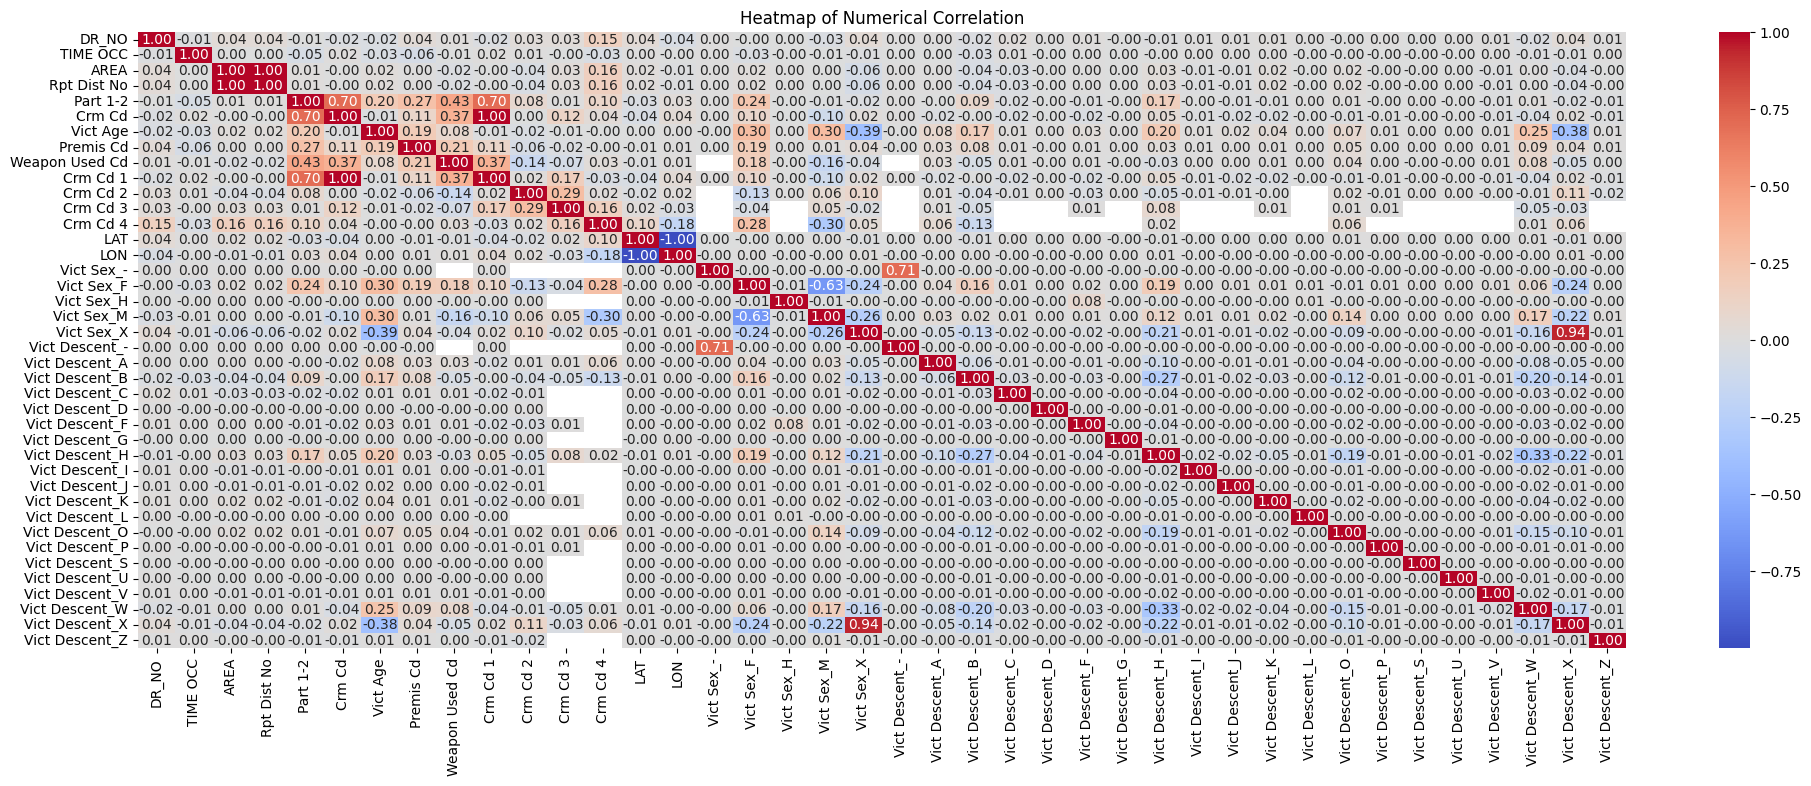

In [10]:
df_encoded = pd.get_dummies(df, columns=['Vict Sex', 'Vict Descent'], dtype=int)

numerical_df = df_encoded.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(24, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Correlation')
plt.show()
plt.show()

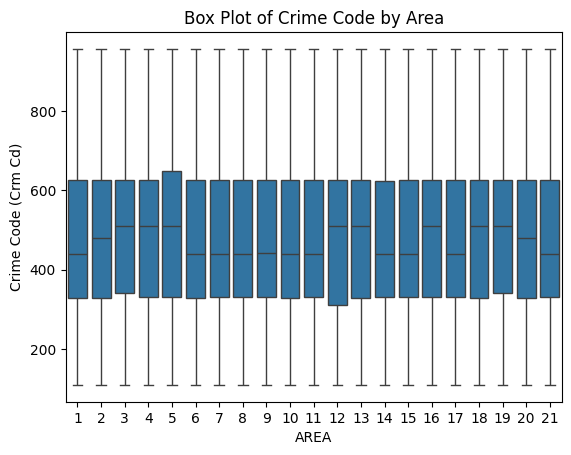

In [11]:
sns.boxplot(x='AREA', y='Crm Cd', data=df)
plt.xlabel('AREA')
plt.ylabel('Crime Code (Crm Cd)')
plt.title('Box Plot of Crime Code by Area')
plt.show()

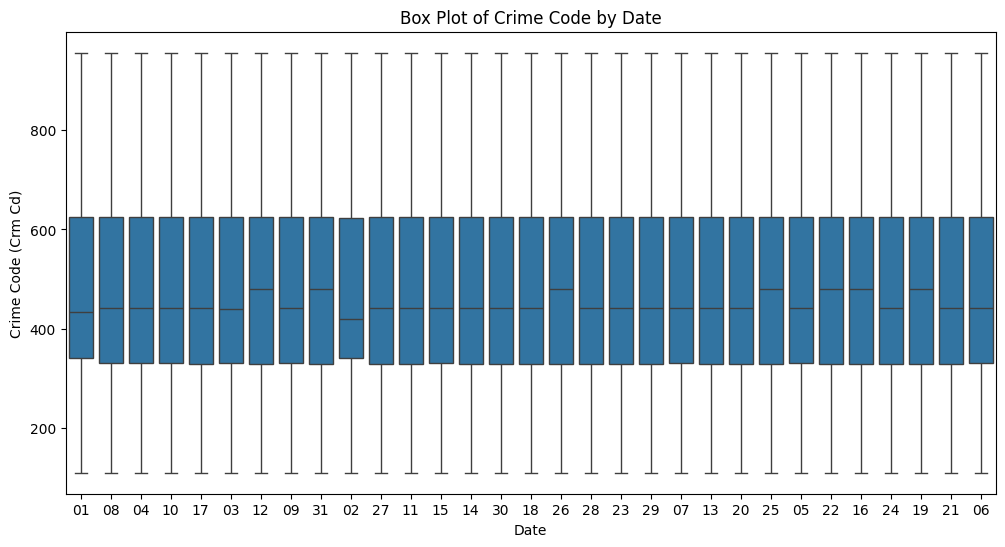

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Date', y='Crm Cd', data=df)
plt.xlabel('Date')
plt.ylabel('Crime Code (Crm Cd)')
plt.title('Box Plot of Crime Code by Date')
plt.show()

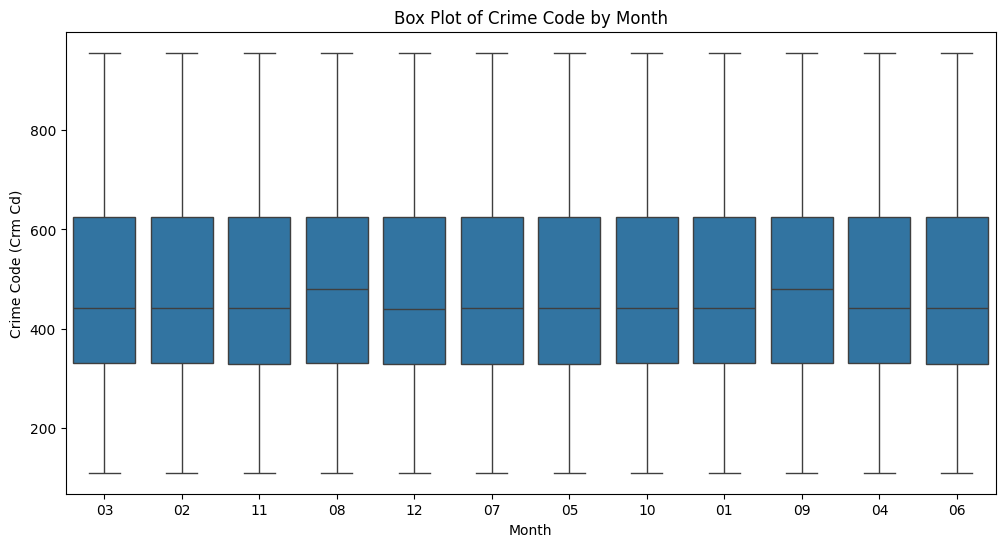

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Crm Cd', data=df)
plt.xlabel('Month')
plt.ylabel('Crime Code (Crm Cd)')
plt.title('Box Plot of Crime Code by Month')
plt.show()

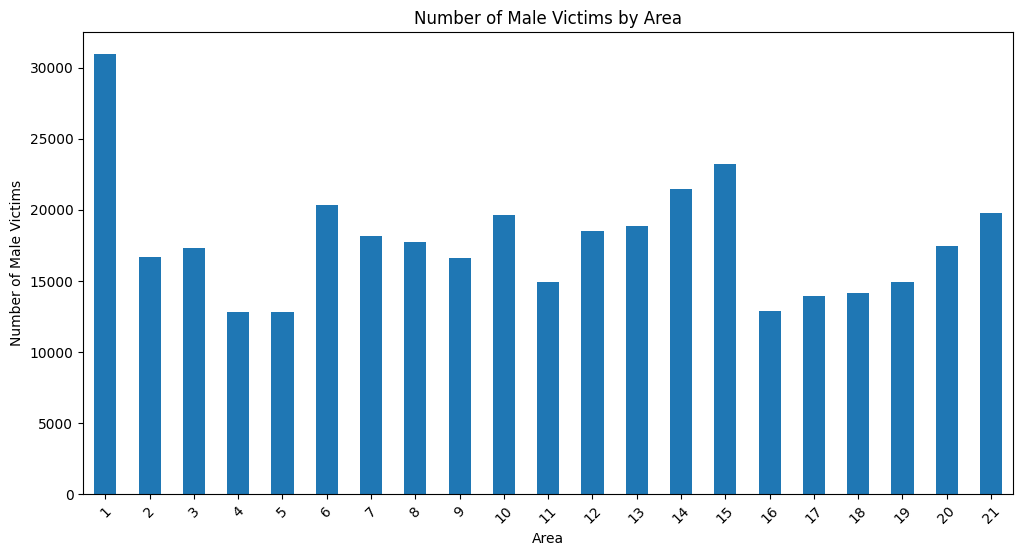

In [26]:
plt.figure(figsize=(12, 6))
fil = df_encoded[df_encoded['Vict Sex_M'] == 1]
area_counts = fil['AREA'].value_counts().sort_index()

# Plot the counts
area_counts.plot(kind='bar')
plt.xlabel('Area')
plt.ylabel('Number of Male Victims')
plt.title('Number of Male Victims by Area')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

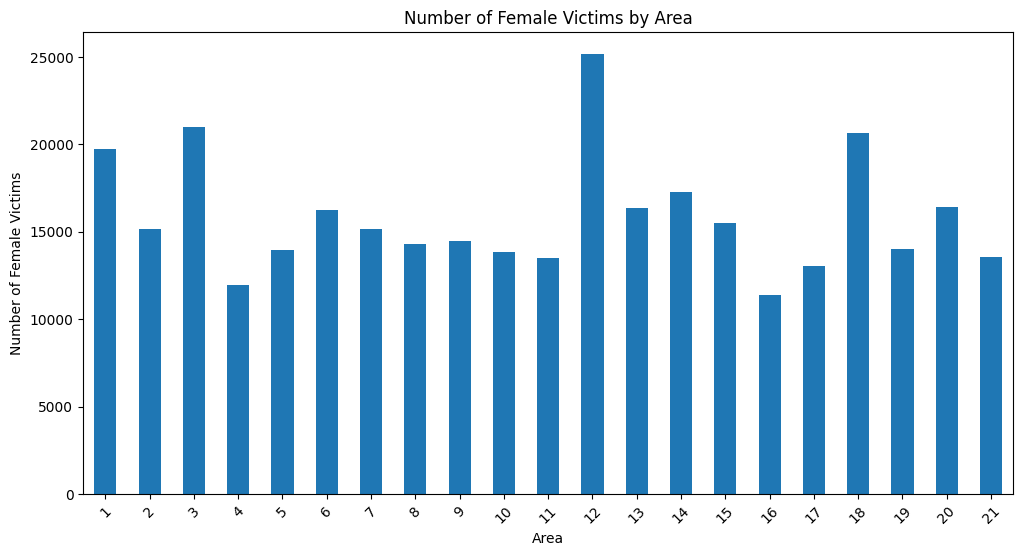

In [27]:
plt.figure(figsize=(12, 6))
fil = df_encoded[df_encoded['Vict Sex_F'] == 1]
area_counts = fil['AREA'].value_counts().sort_index()

# Plot the counts
area_counts.plot(kind='bar')
plt.xlabel('Area')
plt.ylabel('Number of Female Victims')
plt.title('Number of Female Victims by Area')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

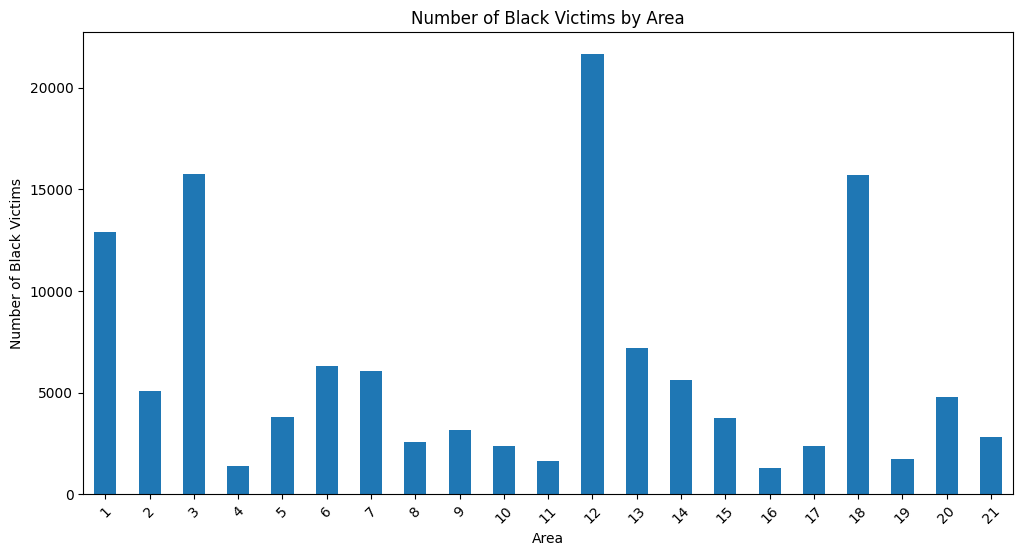

In [28]:
plt.figure(figsize=(12, 6))
fil = df_encoded[df_encoded['Vict Descent_B'] == 1]
area_counts = fil['AREA'].value_counts().sort_index()

# Plot the counts
area_counts.plot(kind='bar')
plt.xlabel('Area')
plt.ylabel('Number of Black Victims')
plt.title('Number of Black Victims by Area')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

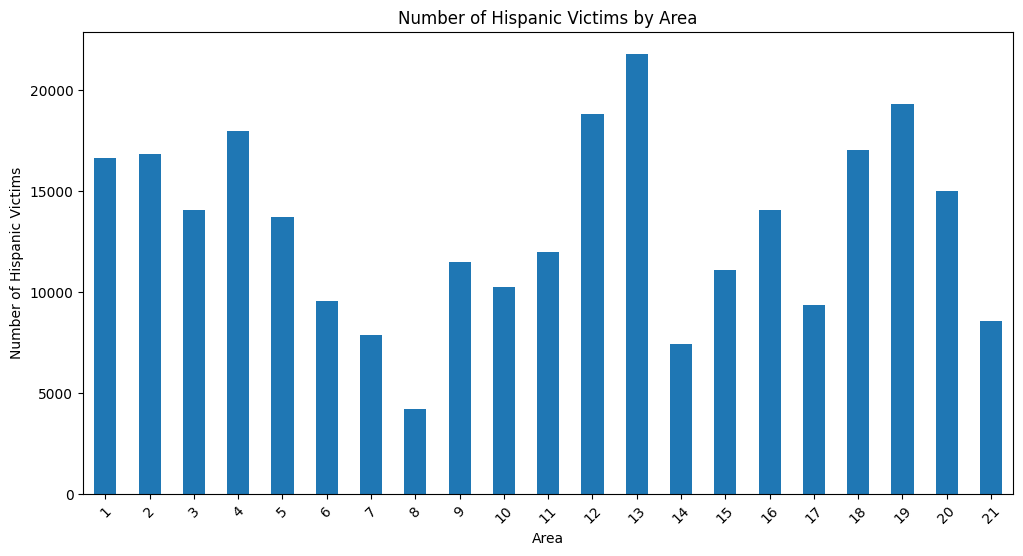

In [30]:
plt.figure(figsize=(12, 6))
fil = df_encoded[df_encoded['Vict Descent_H'] == 1]
area_counts = fil['AREA'].value_counts().sort_index()

# Plot the counts
area_counts.plot(kind='bar')
plt.xlabel('Area')
plt.ylabel('Number of Hispanic Victims')
plt.title('Number of Hispanic Victims by Area')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

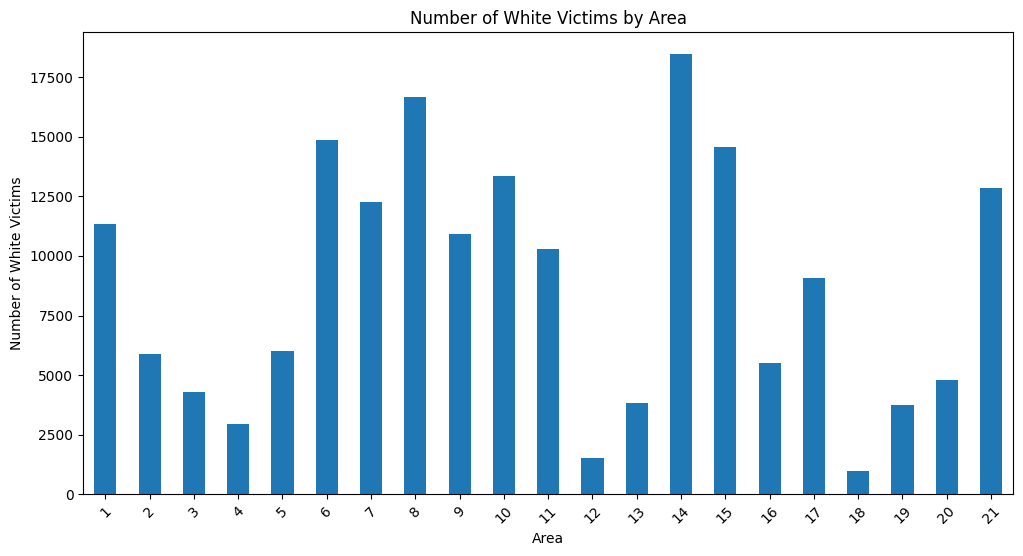

In [31]:
plt.figure(figsize=(12, 6))
fil = df_encoded[df_encoded['Vict Descent_W'] == 1]
area_counts = fil['AREA'].value_counts().sort_index()

# Plot the counts
area_counts.plot(kind='bar')
plt.xlabel('Area')
plt.ylabel('Number of White Victims')
plt.title('Number of White Victims by Area')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='AREA', y='Vict Descent_A', data=df_encoded)
plt.xlabel('Area')
plt.ylabel('Vict Descent_B')
plt.title('Box Plot of Crime Code by Area')
plt.show()